In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
def rdm_demo(t,params):
    
    N_in = params['N_in']
    N_out = params['N_out']
    
    x_t = np.zeros(N_in)
    y_t = .1*np.ones(N_out)
    mask_t = np.ones(N_out)
    
    coh = params['coh']
    
    if t>500 and t<1500:
        x_t[0] = coh
        x_t[1] = -coh
        
    if t>1500:
        y_t[int(coh<0)] = 1.
        
    return x_t, y_t, mask_t

In [79]:
class task:
    
    def __init__(self,task_fun):
        
        self.task_fun = task_fun
        
    def generate_trials(self,params):
        
        '''Inputs:
        params - List of Dicts of trialwise params (Length=Batch Size)
            Keys (Required):
                dt - time step for simulation
                tau - time constant for units
                N_in - number of inputs
                N_out - number of outputs
                N_batch - batch size
                stim_noise - gaussian noise of stimulus
            
            Note:
            Additional keys necessary to generate trials from user implemented trial function should be included here
        
            '''
        
        if isinstance(params, (list,)):
            
            self.dt = params[0]['dt']
            self.tau = params[0]['tau']
            self.alpha = self.dt/self.tau
            self.T = params[0]['T']
            N_steps = int(np.ceil(self.T/self.dt))

            N_in = params[0]['N_in']
            N_out = params[0]['N_out']
            N_batch = params[0]['N_batch']

            x_data = np.zeros([N_batch,N_steps,N_in])
            y_data = np.zeros([N_batch,N_steps,N_out])
            mask = np.zeros([N_batch,N_steps,N_out])

            for ii in range(N_batch):
                
                stim_noise = params[ii]['stim_noise']
                
                for tt in range(N_steps):
                    x_data[ii,tt,:], y_data[ii,tt,:],mask[ii,tt,:] = self.task_fun(tt*self.dt,params[ii])

                x_data[ii,:,:] += np.sqrt(2*self.alpha*stim_noise*stim_noise)*np.random.randn(N_steps,N_in)

            return x_data,y_data,mask
            
        else:

            self.dt = params['dt']
            self.tau = params['tau']
            self.alpha = self.dt/self.tau
            self.T = params['T']
            N_steps = int(np.ceil(self.T/self.dt))

            N_in = params['N_in']
            N_out = params['N_out']
            N_batch = params['N_batch']

            stim_noise = params['stim_noise']

            x_data = np.zeros([N_batch,N_steps,N_in])
            y_data = np.zeros([N_batch,N_steps,N_out])
            mask = np.zeros([N_batch,N_steps,N_out])

            for ii in range(N_batch):
                for tt in range(N_steps):
                    x_data[ii,tt,:], y_data[ii,tt,:],mask[ii,tt,:] = self.task_fun(tt*self.dt,params)

            x_data += np.sqrt(2*self.alpha*stim_noise*stim_noise)*np.random.randn(N_batch,N_steps,N_in)

            return x_data,y_data,mask

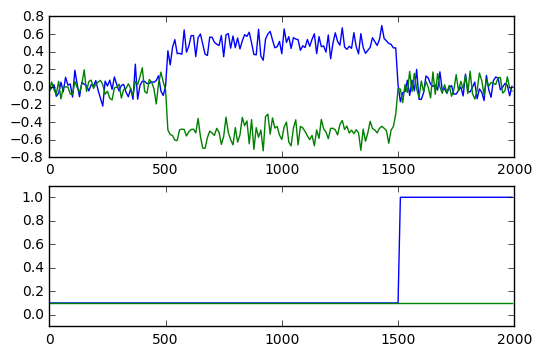

In [80]:
dt = 10.
tau = 100.
T = 2000.
N_in = 2
N_out = 2
N_batch = 32
stim_noise = 0.2

cohs = [-1.,-.5,.5,1.]
p_cohs = [.25,.25,.25,.25]

task_rdm = task(rdm_demo)

params = []
for ii in range(N_batch):
    coh = np.random.choice(cohs,p=p_cohs)
    params.append(dict(dt=dt,tau=tau,T=T,N_in=N_in,N_out=N_out,N_batch=N_batch,stim_noise=stim_noise,coh=coh))


x_data,y_data,masks = task_rdm.generate_trials(params)

plt.subplot(2,1,1)
plt.plot(np.arange(len(x_data[0,:,:]))*dt,x_data[0,:,:])
plt.subplot(2,1,2)
plt.plot(np.arange(len(y_data[0,:,:]))*dt,y_data[0,:,:])
plt.ylim([-.1,1.1])
plt.show()